## Importing Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading and Understanding data

In [2]:
data=pd.read_csv("sales_data.csv",index_col="date",parse_dates=True)

In [3]:
data.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


In [4]:
data.describe()

,sales
count,72.000000
mean,401710.138889
std,39999.439045
min,311022.000000
25%,374655.750000
50%,398296.500000
75%,432892.500000
max,501232.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2009-10-01 to 2015-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


## Checking for null values

In [6]:
data.isnull().sum()*100/data.shape[0]

sales    0.0
dtype: float64

## Plotting graph 

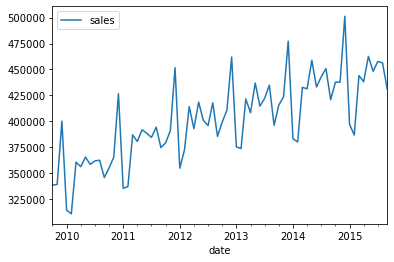

In [7]:
data.plot()

In [8]:
data.shape

(72, 1)

## Seasonal decompose of data

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decomposed= seasonal_decompose(data['sales'],model='additive')

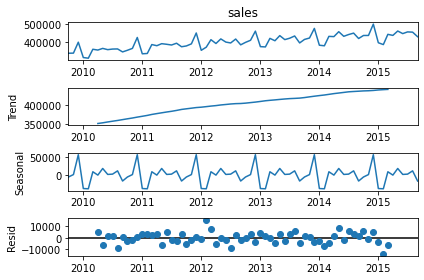

In [11]:
x=decomposed.plot()

## Removing trend and making time series stationary

In [12]:
data['stationary']=data['sales'] - data['sales'].shift(1) ## Differencing

In [13]:
x=data['stationary'].dropna()

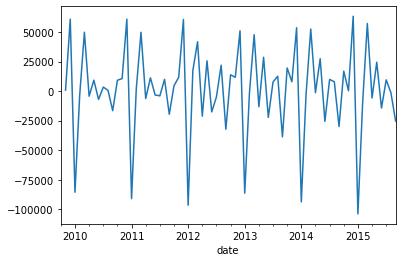

In [14]:
data['stationary'].plot()

## Importing Auto Regressive model

In [15]:
from statsmodels.tsa.ar_model import AR

## Dividing data into train and test

In [16]:
x=data['stationary'].dropna()

In [17]:
train_data=x.iloc[:-13]

In [18]:
test_data=x.iloc[-13:]

In [19]:
train_data.shape

(58,)

In [20]:
test_data.shape

(13,)

## Model Building

In [21]:
model=AR(train_data)

/home/sumit/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarni

In [22]:
model_fit=model.fit()

## Number of lag taken for this model

In [23]:
print("The lag value chose is: %s" %model_fit.k_ar)

The lag value chose is: 10


## Prediction

In [24]:
predictions=model_fit.predict(start=len(train_data),end=len(train_data)+len(test_data)-1,dynamic=False)

In [25]:
new_data=pd.concat([data['stationary'].tail(13),predictions],axis=1)

In [26]:
new_data=new_data.rename(columns={'stationary':'actual',0:'predicted'})

In [27]:
new_data.head()

,actual,predicted
2014-09-01,-30042.0,-44919.121410
2014-10-01,16831.0,23909.439864
2014-11-01,208.0,37875.241649
2014-12-01,63322.0,28469.810115
2015-01-01,-103980.0,-48774.156096


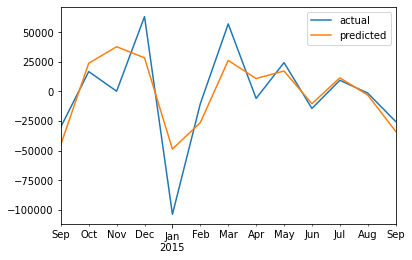

In [28]:
new_data.plot()

In [29]:
new_data.head()

,actual,predicted
2014-09-01,-30042.0,-44919.121410
2014-10-01,16831.0,23909.439864
2014-11-01,208.0,37875.241649
2014-12-01,63322.0,28469.810115
2015-01-01,-103980.0,-48774.156096


## Model Evaluation

In [30]:
from sklearn.metrics import r2_score
r2=r2_score(new_data['actual'],new_data['predicted'])

In [31]:
r2

0.6372804653165806